In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Dataset

In [ ]:
#load data
data = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t" )
data1 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
data2 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
data3 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t")
data4 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [ ]:
#gathring the data
total_data = pd.concat([data, data1, data2, data3, data4], ignore_index=True)
print(data.shape)
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(total_data.shape)

(3446, 12)
(3730, 12)
(3894, 12)
(4484, 12)
(3816, 12)
(19370, 12)


In [ ]:
#present data
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55


In [ ]:
#data describtion
data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,1468.835461,919.112014,681.773360,560.560360,560.628265,-9.334010,2.398433,72.891759
std,106.210585,645.883499,434.358154,358.399365,357.300076,74.863682,14.445252,37.003019
min,1322.000000,0.000000,0.000000,80.000000,80.000000,-190.000000,-45.000000,5.000000
25%,1388.000000,465.250000,331.000000,312.000000,312.000000,-80.000000,0.000000,45.000000
50%,1451.500000,808.500000,648.000000,466.000000,472.000000,-5.000000,0.000000,71.000000
75%,1538.000000,1300.000000,976.000000,691.250000,694.000000,5.000000,0.000000,97.000000
max,1743.000000,8721.000000,2226.000000,3130.000000,3104.000000,365.000000,45.000000,210.000000


In [ ]:
#data types
total_data.dtypes
#total_data.info()

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

# Data visualization

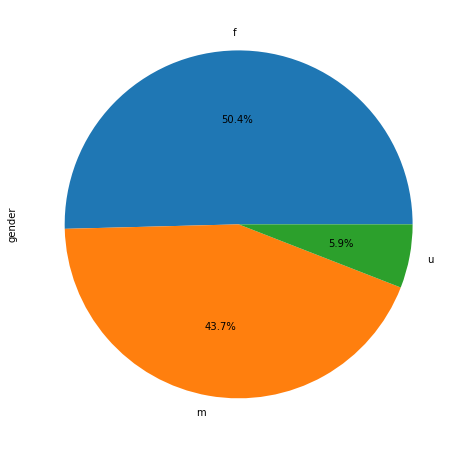

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [ ]:
#pie_graph to present gender
plt.figure(1, figsize=(8,8))
total_data.gender.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
total_data.gender.value_counts()

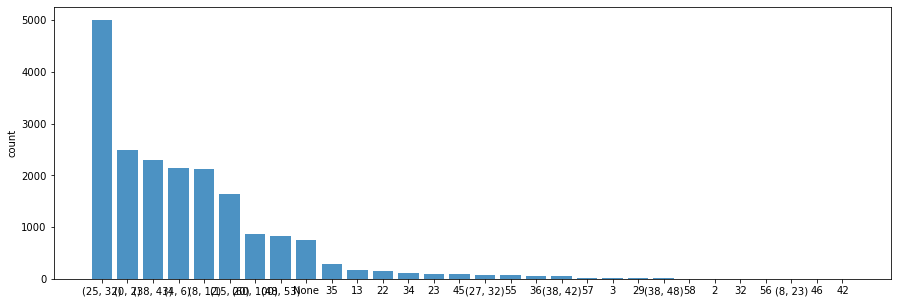

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
32              3
56              2
(8, 23)         1
46              1
42              1
Name: age, dtype: int64

In [ ]:
#bar chart to present age

age = ['(25, 32)' , '(0, 2)', '(38, 43)' ,'(4, 6) ','(8, 12)','(15, 20)','(60, 100)','(48, 53)' ,'None','35','13','22','34','23' ,'45','(27, 32)','55','36','(38, 42)','57','3','29','(38, 48)','58','2','32','56','(8, 23)','46','42']

plt.figure(figsize=(15, 5))  # width:20, height:3
plt.bar(age, total_data.age.value_counts(), align='center', alpha=0.8)
plt.ylabel('count')
plt.show()
#to Create horizontal bar plot here "plt.barh(labels, values)"

total_data.age.value_counts()

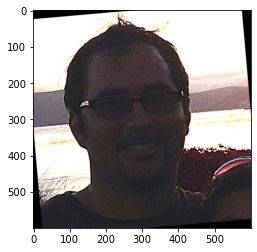

In [ ]:
#present image from the dataset
path = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/"+total_data.user_id.loc[8]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[8])+"."+total_data.original_image.loc[8]
img = load_img(path)
plt.imshow(img)
plt.show()

# Generate dataframe

In [ ]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

In [ ]:
img_path = []
for row in total_data.iterrows():
    path = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

df['img_path'] = img_path

In [ ]:
#present data befor
df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",m,1102,296,357,357,/kaggle/input/adience-benchmark-gender-and-age...
1,"(25, 32)",f,1713,580,325,325,/kaggle/input/adience-benchmark-gender-and-age...
2,"(15, 20)",f,1437,664,306,306,/kaggle/input/adience-benchmark-gender-and-age...
3,"(25, 32)",f,978,229,803,803,/kaggle/input/adience-benchmark-gender-and-age...
4,"(25, 32)",m,1745,910,242,242,/kaggle/input/adience-benchmark-gender-and-age...


In [ ]:
#correlation
corr = df.corr()
corr

,x,y,dx,dy
x,1.000000,0.343700,-0.279544,-0.280495
y,0.343700,1.000000,-0.296527,-0.293110
dx,-0.279544,-0.296527,1.000000,0.991960
dy,-0.280495,-0.293110,0.991960,1.000000


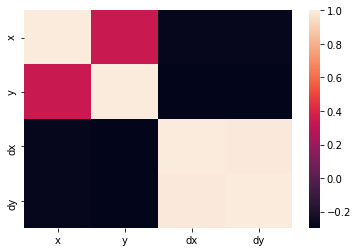

In [ ]:
#heatmap
sns.heatmap(corr)

# Mapping age label and drop irrelevant data

In [ ]:
#mapping ages
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]

        
#drop none values in age        
df = df.drop(labels=drop_labels, axis=0) #droped None values
#df.age.value_counts(dropna=False)


#drop none gender values(u)  
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
#unbiased_data.info()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Labelling Age and Gender 

In [ ]:
#labeling gender
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

#labeling age
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

label_to_age_map = {value: key for key, value in age_to_label_map.items()}
label_to_gender_map = {value: key for key, value in gender_to_label_map.items()}

In [ ]:
#change age and gender to labels
unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])

unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,1,1102,296,357,357,/kaggle/input/adience-benchmark-gender-and-age...
1,4,0,1713,580,325,325,/kaggle/input/adience-benchmark-gender-and-age...
2,3,0,1437,664,306,306,/kaggle/input/adience-benchmark-gender-and-age...
3,4,0,978,229,803,803,/kaggle/input/adience-benchmark-gender-and-age...
4,4,1,1745,910,242,242,/kaggle/input/adience-benchmark-gender-and-age...


# Plot random image with its size, gender and age  

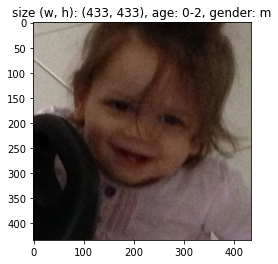

In [ ]:
#to plot image
def show_image(img_filename, age, gender):
    img = Image.open(img_filename)
    plt.imshow(img)
    plt.title(f'size (w, h): {img.size}, age: {age}, gender: {gender}')
    plt.show()
    
idx = np.random.randint(unbiased_data.shape[0])
fname = unbiased_data['img_path'].iloc[idx]
age = label_to_age_map[unbiased_data['age'][idx]]
gender = label_to_gender_map[unbiased_data['gender'][idx]]
show_image(fname, age, gender)

# Model

### Gender classification

In [ ]:
#splitting dataset
X = unbiased_data[['img_path']]
y = unbiased_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [ ]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 96)      14208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 96)        0         
_________________________________________________________________
layer_normalization (LayerNo (None, 55, 55, 96)        192       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 256)       0         
_________________________________________________________________
layer_normalization_1 (Layer (None, 27, 27, 256)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       5

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs=20
history = model.fit(train_images, y_train, batch_size=32,  epochs=epochs, validation_data=(test_images, y_test), callbacks=[callback])


Epoch 1/20
382/382 [==============================] - 1952s 5s/step - loss: 0.7787 - accuracy: 0.5343 - val_loss: 0.7795 - val_accuracy: 0.5338
Epoch 2/20
382/382 [==============================] - 1944s 5s/step - loss: 0.7781 - accuracy: 0.5351 - val_loss: 0.7795 - val_accuracy: 0.5338
Epoch 3/20
382/382 [==============================] - 1951s 5s/step - loss: 0.7781 - accuracy: 0.5351 - val_loss: 0.7795 - val_accuracy: 0.5338
Epoch 4/20
382/382 [==============================] - 1953s 5s/step - loss: 0.7781 - accuracy: 0.5351 - val_loss: 0.7795 - val_accuracy: 0.5338
Epoch 5/20
382/382 [==============================] - 1960s 5s/step - loss: 0.7781 - accuracy: 0.5351 - val_loss: 0.7795 - val_accuracy: 0.5338
Epoch 6/20
382/382 [==============================] - 1966s 5s/step - loss: 0.7781 - accuracy: 0.5351 - val_loss: 0.7795 - val_accuracy: 0.5338


In [ ]:
#save history
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)    

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('Testing accuracy',test_acc)

164/164 - 222s - loss: 0.7795 - accuracy: 0.5338
Testing accuracy 0.5338044166564941


In [ ]:
train_acc=model.evaluate(train_images, y_train)
print('Training accuracy',train_acc)

382/382 [==============================] - 533s 1s/step - loss: 0.7781 - accuracy: 0.5351
Training accuracy [0.7781448364257812, 0.5351178646087646]


### Predection gender (0:f, 1:m)

In [ ]:
#predection
model.predict(test_images[:4])
#test_images[:4]
y_test[:4]

,gender
16807,1
1395,1
2362,0
19,1


In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
CM=classification_report(y_true, pred)
print(CM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5236

    accuracy                           1.00      5236
   macro avg       1.00      1.00      1.00      5236
weighted avg       1.00      1.00      1.00      5236



In [ ]:
from sklearn.metrics import r2_score
print('R2 score for gender: ', r2_score(y_true, pred))

R2 score for gender:  1.0


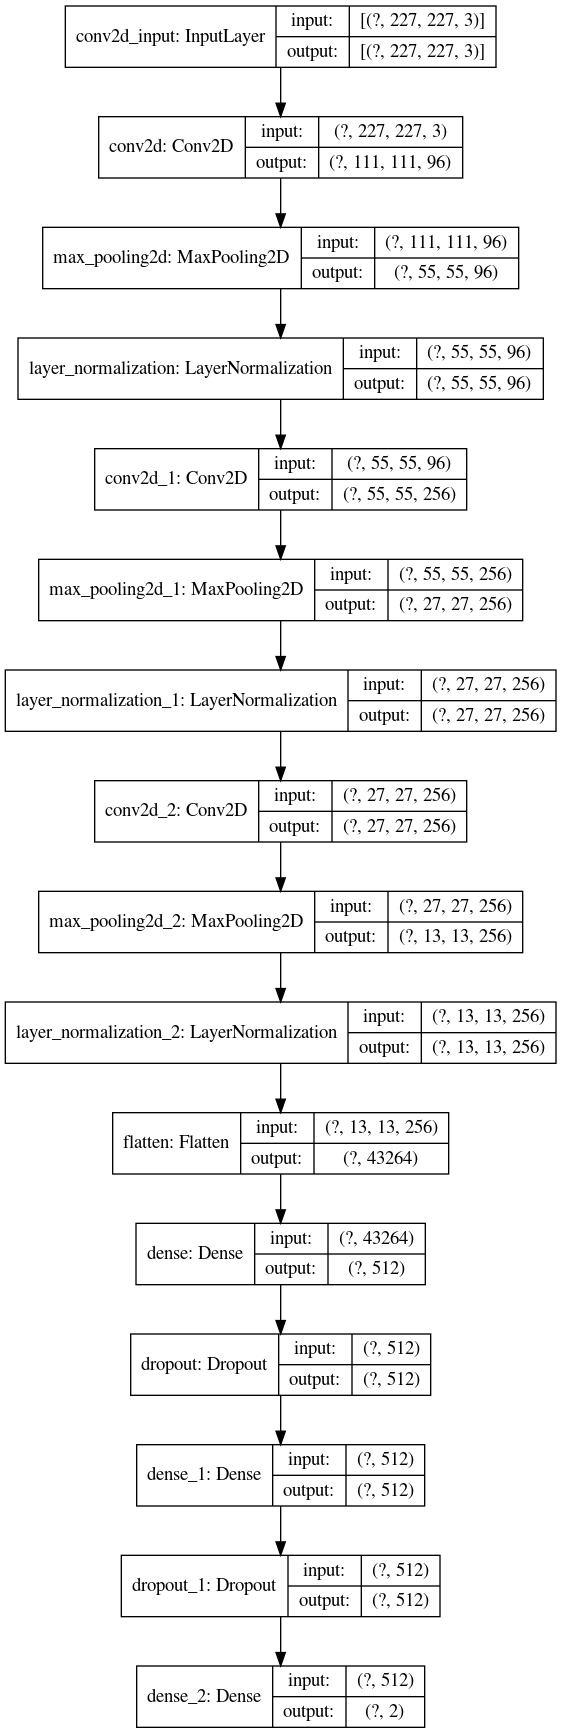

In [ ]:
#visualaze cnn model
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### -----------------------------------------------------------------------------------------------

### Age classification

In [ ]:
#splitting dataset
X = unbiased_data[['img_path']]
y = unbiased_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [ ]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs=20
history = model.fit(train_images, y_train, batch_size=32, epochs=epochs, validation_data=(test_images, y_test), callbacks=[callback])

Epoch 1/20
382/382 [==============================] - 534s 1s/step - loss: 1.9770 - accuracy: 0.2968 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 2/20
382/382 [==============================] - 534s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 3/20
382/382 [==============================] - 535s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 4/20
382/382 [==============================] - 536s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 5/20
382/382 [==============================] - 537s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065


In [ ]:
#save history
with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('Testing accuracy',test_acc)

164/164 - 59s - loss: 1.9675 - accuracy: 0.3065
Testing accuracy 0.306531697511673


In [ ]:
train_acc=model.evaluate(train_images, y_train)
print('Training accuracy',train_acc)

382/382 [==============================] - 140s 366ms/step - loss: 1.9764 - accuracy: 0.2976
Training accuracy [1.9764430522918701, 0.29756057262420654]


### Predection age ('0-2':0,  '4-6':1,  '8-13':2,  '15-20':3,  '25-32':4,  '38-43':5,  '48-53':6, '60+':7)

In [ ]:
#predection
model.predict(test_images[:4])
#test_images[:4]
y_test[:4]

,age
16807,1
1395,3
2362,3
19,4


In [ ]:
from sklearn.metrics import confusion_matrix
pred2 = model.predict(test_images)
pred2 = np.argmax(pred2,axis = 1) 
y_true2 = np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
CM2=classification_report(y_true2, pred2)
print(CM2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    5236.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00    5236.0
   macro avg       0.00      0.00      0.00    5236.0
weighted avg       0.00      0.00      0.00    5236.0



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import r2_score
print('R2 score for age: ', r2_score(y_true2, pred2))

R2 score for age:  0.0


other callback test:

In [ ]:
callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True,
    write_images=False, update_freq='epoch', profile_batch=2,
    embeddings_freq=0, embeddings_metadata=None ) # Callback for TensorBoard

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, y_train, batch_size=32,  epochs=epochs, validation_data=(test_images, y_test), callbacks=[callback])

Epoch 1/20
382/382 [==============================] - 539s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 2/20
382/382 [==============================] - 539s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 3/20
382/382 [==============================] - 538s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 4/20
382/382 [==============================] - 540s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 5/20
382/382 [==============================] - 539s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 6/20
382/382 [==============================] - 542s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065
Epoch 7/20
382/382 [==============================] - 543s 1s/step - loss: 1.9764 - accuracy: 0.2976 - val_loss: 1.9675 - val_accuracy: 0.3065

In [ ]:
## summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
## summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()